# Social Media Analysis - Global Warming

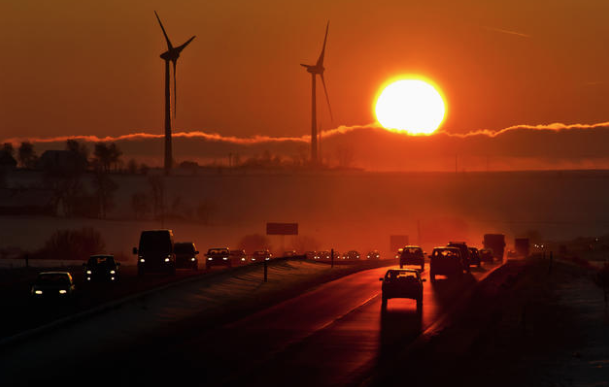

In [358]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from tweepy.streaming import StreamListener
import json
import time
import sys
import tweepy 
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Shilpa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Initializing Tweet Downloads

In order to download tweets, a Twitter Development Account needs to be setup before tweets can be downloaded successfully.

In [145]:
consumer_key = "XXXXXXX"
consumer_secret = "XXXXXXX"
access_token = "XXXXX"
access_token_secret = "XXXXXXXX"

In [146]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Access key authentication
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = tweepy.API(auth)

In [147]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 1000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

Keywords used to download the tweets are:<br>

 - **Climate Change**
 - **Global Warming**
 - **Pollution**
 - **Greta Thunberg**
 

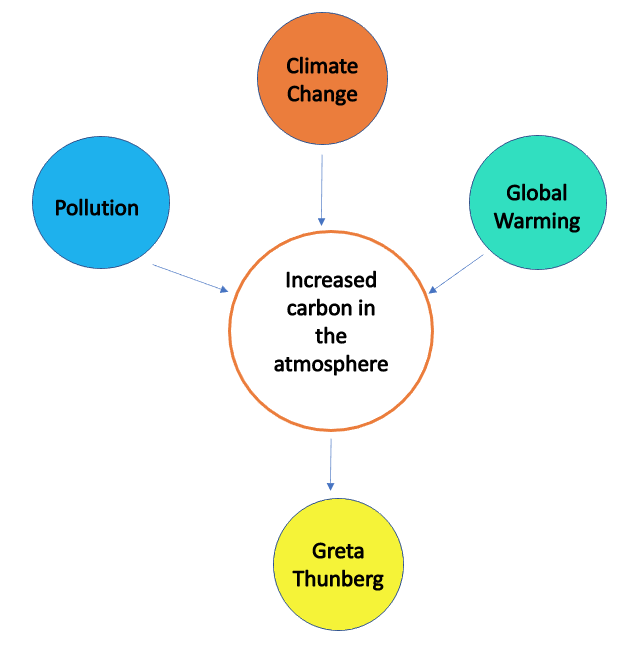

In [148]:
# Initialize Stream listener
l = MyStreamListener()

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ["climate change", "global warming", "pollution", "Greta Thunberg"])

In [149]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())


dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


In [150]:
type(tweets_data)

list

### The Dataset

In [359]:
# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])

# Print head of DataFrame

print(df.head(1))

                       created_at                   id               id_str  \
0  Wed May 26 19:07:10 +0000 2021  1397630407244500992  1397630407244500992   

                                                text  \
0  RT @JLehmannCornell: Soil carbon storage to ad...   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                      None                  NaN   

  in_reply_to_user_id_str  ... quote_count reply_count retweet_count  \
0                    None  ...           0           0             0   

  favorite_count                                           entities favorited  \
0              0  {'hashtags': [], 'urls': [], 'user_mentions': ...     False   

  retweeted  filter_level  lang   timestamp_ms  
0     False           low    en  1622056030461  

[1 rows x 28 columns]


## Count of keywords

In [430]:
#Total number of times climate change appears in the data set
climate_change = df["text"].str.contains("climate change", case = False)
cc_keywords = (np.sum(climate_change)/df.shape[0])*100

In [431]:
#Total number of times global warming appears in the data set
global_warming = df["text"].str.contains("global warming", case = False)
gw_keywords = (np.sum(global_warming)/df.shape[0])*100

In [432]:
#Total number of times pollution appears in the data set
pollution = df["text"].str.contains("pollution", case = False)
pollution_keywords = (np.sum(pollution)/df.shape[0])*100

In [433]:
#Total number of times greta thunberg appears in the data set
greta = df["text"].str.contains("Greta Thunberg", case = False)
greta_keywords = (np.sum(greta)/df.shape[0])*100

In [442]:
#Create Dataframe

most_keywords = [["Climate Change", cc_keywords], ["Pollution", pollution_keywords], ["Global Warming", gw_keywords], ["Greta Thunberg",greta_keywords ]]
keywords_summary = pd.DataFrame(most_keywords, columns = ["Keywords", "Percentage"])
keywords_summary.style.background_gradient(cmap = "Reds")


,Keywords,Percentage
0,Climate Change,28.100000
1,Pollution,15.500000
2,Global Warming,2.700000
3,Greta Thunberg,1.700000


In [458]:
#A sample of the actual tweets
pd.set_option("display.max_colwidth", None)
print(df["text"])

0        RT @JLehmannCornell: Soil carbon storage to address climate change enjoys more bipartisan support from US voters and farmers than previousl…
1       RT @unicefchief: No one suffers more from a change in climate than a child.\n\nAs adults, we are responsible for the health of the planet we…
2         Hopefully, this polling will mean that ultra-expensive, big-government approaches to addressing climate change are… https://t.co/PMTviTok77
3        Are you in #Virginia? Are you following the important #Virginia state races coming up quickly? Please read this imp… https://t.co/DTVwHUjYXs
4        RT @SPE_Token_BSC: “The leading cause of coral bleaching is climate change. A warming planet means a warmer ocean, and a change in water te…
                                                                            ...                                                                      
995      RT @SPE_Token_BSC: “The leading cause of coral bleaching is climate change. A warming plane

## Time Series

### Keywords as time series metrics
#### Keywords per one minute window

In [160]:
#Convert to datetime object

df["created_at"] = pd.to_datetime(df["created_at"])


In [161]:
#Set the index to the "created at" column
twitter_time = df.set_index("created_at")

In [195]:
#Function to calculate text

def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    Checks text
    Returns a logical pandas Series.
    """
    contains_column = data['text'].str.contains(word, case = False)
    return contains_column

In [196]:
#How many times does climate change appear in 1 minute window 
twitter_time["climate change"] = check_word_in_tweet("climate change", twitter_time)
mean_climate_change = twitter_time["climate change"].resample("1 min").mean()


In [197]:
#How many times does global warming appear in 1 minute window 

twitter_time["global warming"] = check_word_in_tweet("global warming", twitter_time)
mean_global_warming = twitter_time["global warming"].resample("1 min").mean()
mean_global_warming

created_at
2021-05-26 19:07:00+00:00    0.018519
2021-05-26 19:08:00+00:00    0.045455
2021-05-26 19:09:00+00:00    0.015873
2021-05-26 19:10:00+00:00    0.098039
2021-05-26 19:11:00+00:00    0.026667
2021-05-26 19:12:00+00:00    0.013158
2021-05-26 19:13:00+00:00    0.039216
2021-05-26 19:14:00+00:00    0.039216
2021-05-26 19:15:00+00:00    0.013333
2021-05-26 19:16:00+00:00    0.025000
2021-05-26 19:17:00+00:00    0.000000
2021-05-26 19:18:00+00:00    0.018182
2021-05-26 19:19:00+00:00    0.029412
2021-05-26 19:20:00+00:00    0.018519
2021-05-26 19:21:00+00:00    0.027778
2021-05-26 19:22:00+00:00    0.022727
Freq: T, Name: global warming, dtype: float64

In [198]:
#How many times does pollution appear in 1 minute window 

twitter_time["pollution"] = check_word_in_tweet("pollution", twitter_time)
mean_pollution = twitter_time["pollution"].resample("1 min").mean()
mean_pollution

created_at
2021-05-26 19:07:00+00:00    0.111111
2021-05-26 19:08:00+00:00    0.151515
2021-05-26 19:09:00+00:00    0.142857
2021-05-26 19:10:00+00:00    0.137255
2021-05-26 19:11:00+00:00    0.200000
2021-05-26 19:12:00+00:00    0.144737
2021-05-26 19:13:00+00:00    0.156863
2021-05-26 19:14:00+00:00    0.274510
2021-05-26 19:15:00+00:00    0.186667
2021-05-26 19:16:00+00:00    0.112500
2021-05-26 19:17:00+00:00    0.261538
2021-05-26 19:18:00+00:00    0.181818
2021-05-26 19:19:00+00:00    0.088235
2021-05-26 19:20:00+00:00    0.092593
2021-05-26 19:21:00+00:00    0.180556
2021-05-26 19:22:00+00:00    0.022727
Freq: T, Name: pollution, dtype: float64

In [199]:
#How many times does greta thunberg appear in 1 minute window 

twitter_time["Greta Thunberg"] = check_word_in_tweet("Greta Thunberg", twitter_time)
mean_greta = twitter_time["Greta Thunberg"].resample("1 min").mean()
mean_greta

created_at
2021-05-26 19:07:00+00:00    0.000000
2021-05-26 19:08:00+00:00    0.015152
2021-05-26 19:09:00+00:00    0.000000
2021-05-26 19:10:00+00:00    0.019608
2021-05-26 19:11:00+00:00    0.013333
2021-05-26 19:12:00+00:00    0.000000
2021-05-26 19:13:00+00:00    0.000000
2021-05-26 19:14:00+00:00    0.058824
2021-05-26 19:15:00+00:00    0.000000
2021-05-26 19:16:00+00:00    0.037500
2021-05-26 19:17:00+00:00    0.000000
2021-05-26 19:18:00+00:00    0.054545
2021-05-26 19:19:00+00:00    0.044118
2021-05-26 19:20:00+00:00    0.018519
2021-05-26 19:21:00+00:00    0.000000
2021-05-26 19:22:00+00:00    0.022727
Freq: T, Name: Greta Thunberg, dtype: float64

### Creating Visualization - Keywords Per Minute

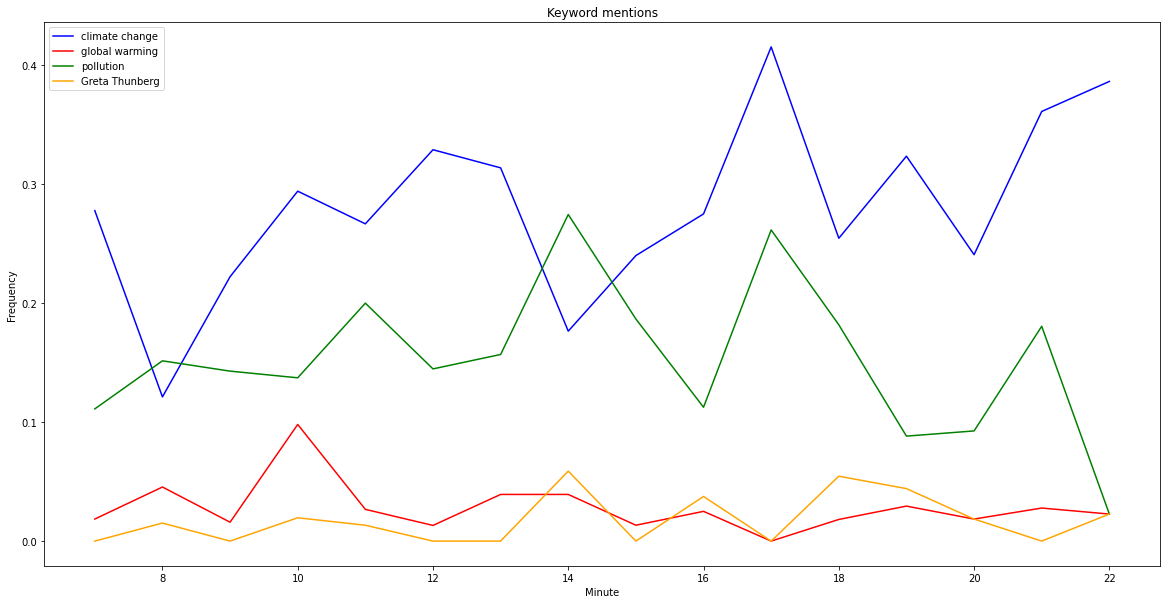

In [168]:
import matplotlib.pyplot as plt

plt.plot(mean_climate_change.index.minute, mean_climate_change, color = "blue")
plt.plot(mean_global_warming.index.minute, mean_global_warming, color = "red")
plt.plot(mean_pollution.index.minute, mean_pollution, color = "green")
plt.plot(mean_greta.index.minute, mean_greta, color = "orange")

plt.xlabel("Minute")
plt.ylabel("Frequency")
plt.title("Keyword mentions")
plt.legend(("climate change", "global warming", "pollution", "Greta Thunberg"))
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

### Sentiment Analysis - Understanding Reactions to Topics

The idea behind sentiment analysis is that we can count the words which are positive or negative as a proportion of the words in the rest of the document.<br>
**Four score values obtained from sentiment analysis:**<br>
 - Negative: Provides the negative sentiment value 
 - Positive: Provides the positive sentiment value
 - Neutral: Measures words that do not contribute to the sentiment
 - Compound: A combination of the positive and negative (an overall assessment that ranges between negative 1 and positive 1.
 
**Below 0 is negative, and above 0 is positive**




In [216]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores = twitter_time["text"].apply(sid.polarity_scores)

In [464]:
#First tweet:

tweet_1 = df.text.loc[0]
print(tweet_1)
print(sid.polarity_scores(tweet_1))

RT @JLehmannCornell: Soil carbon storage to address climate change enjoys more bipartisan support from US voters and farmers than previousl…
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.7414}


In [465]:
#Second tweet:

tweet_2 = df.text.loc[1]
print(tweet_2)
print(sid.polarity_scores(tweet_2))

RT @unicefchief: No one suffers more from a change in climate than a child.

As adults, we are responsible for the health of the planet we…


In [468]:
#Random tweet:
tweet_3 = df.text.loc[15]
print(tweet_3)
print(sid.polarity_scores(tweet_3))

RT @SDonziger: BREAKING: @Chevron shareholders just slammed CEO Wirth over Ecuador pollution and for financing my prosecution. Just minutes…
{'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'compound': -0.4939}


In [220]:
print(sentiment_scores)

created_at
2021-05-26 19:07:10+00:00    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
2021-05-26 19:07:10+00:00    {'neg': 0.185, 'neu': 0.734, 'pos': 0.08, 'com...
2021-05-26 19:07:11+00:00    {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...
2021-05-26 19:07:15+00:00    {'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'comp...
2021-05-26 19:07:15+00:00    {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
                                                   ...                        
2021-05-26 19:22:43+00:00    {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
2021-05-26 19:22:43+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2021-05-26 19:22:44+00:00    {'neg': 0.179, 'neu': 0.598, 'pos': 0.222, 'co...
2021-05-26 19:22:45+00:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2021-05-26 19:22:46+00:00    {'neg': 0.152, 'neu': 0.59, 'pos': 0.258, 'com...
Name: text, Length: 1000, dtype: object


### Generating sentiment averages over time

In [287]:
#Extracting only the compound fields from the overall sentiment scores
#Average compound value for tweets regarding climate change

sentiment = sentiment_scores.apply(lambda x: x["compound"])
sentiment_cc = sentiment[check_word_in_tweet("climate change", twitter_time)].resample("1 min").mean()


In [288]:
#Average compound value for tweets regarding global warming

sentiment_gw = sentiment[check_word_in_tweet("global warming", twitter_time)].resample("1 min").mean()


In [289]:
#Average compound value for tweets regarding pollution

sentiment_pollution = sentiment[check_word_in_tweet("pollution", twitter_time)].resample("1 min").mean()

In [290]:
#Average compound value for tweets regarding global warming

sentiment_greta = sentiment[check_word_in_tweet("Greta Thunberg", twitter_time)].resample("1 min").mean()


### Overall Sentiment Analysis Per Topic

In [291]:
#Overall climate change sentiment analysis score
overall_cc = sentiment[check_word_in_tweet("climate change", twitter_time)].mean()
overall_cc.round(3)

0.069

In [292]:
#Overall global warming sentiment analysis score
overall_gw = sentiment[check_word_in_tweet("global warming", twitter_time)].mean()
overall_gw.round(3)

0.058

In [293]:
#Overall pollution sentiment analysis score
overall_pollution = sentiment[check_word_in_tweet("pollution", twitter_time)].mean()
overall_pollution.round(3)

-0.035

In [294]:
#Overall Greta Thumberg sentiment analysis score
overall_greta = sentiment[check_word_in_tweet("Greta Thunberg", twitter_time)].mean()
overall_greta.round(3)

-0.104

In [427]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = overall_cc,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Overall Climate Change Sentiment", 'font': {'size': 15}},
    gauge = {
        'axis': {'range': [-1, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [-1, 0], 'color': 'red'},
            {'range': [0, 1], 'color': "royalblue"}],
        }))

fig.update_layout(paper_bgcolor = "white", font = {'color': "darkblue", 'family': "Arial"}, width = 350, height = 300)

fig.show()

In [426]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = overall_gw,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Overall Global Warming Sentiment", 'font': {'size': 15}},
    gauge = {
        'axis': {'range': [-1, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [-1, 0], 'color': 'red'},
            {'range': [0, 1], 'color': "royalblue"}],
        }))

fig.update_layout(paper_bgcolor = "white", font = {'color': "darkblue", 'family': "Arial"}, width = 350, height = 300)

fig.show()

In [425]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = overall_pollution,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Overall Pollution Sentiment", 'font': {'size': 15}},
    gauge = {
        'axis': {'range': [-1, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [-1, 0], 'color': 'red'},
            {'range': [0, 1], 'color': "royalblue"}],
        }))

fig.update_layout(paper_bgcolor = "white", font = {'color': "darkblue", 'family': "Arial"}, width = 350, height = 300)

fig.show()

In [428]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number+delta",
    value = overall_greta,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Overall Greta Thunberg Sentiment", 'font': {'size': 15}},
    gauge = {
        'axis': {'range': [-1, 1], 'tickwidth': 1, 'tickcolor': "darkblue"},
        'bar': {'color': "darkblue"},
        'bgcolor': "white",
        'borderwidth': 2,
        'bordercolor': "gray",
        'steps': [
            {'range': [-1, 0], 'color': 'red'},
            {'range': [0, 1], 'color': "royalblue"}],
        }))

fig.update_layout(paper_bgcolor = "white", font = {'color': "darkblue", 'family': "Arial"}, width = 350, height = 300)

fig.show()

### Plotting Sentiment Scores Over Time



In [321]:
#Extracting only the compound fields from the overall sentiment scores
#Data frame depicting the compund score for each individual tweet

sentiment = sentiment_scores.apply(lambda x: x["compound"]).reset_index()
sentiment.rename(columns = {"text": "compound_score"}, inplace = True)
final_sentiment = sentiment.set_index("created_at")
total_sentiment = pd.concat([twitter_time, final_sentiment], axis = 1)
total_sentiment

,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,...,favorited,retweeted,filter_level,lang,timestamp_ms,climate change,global warming,pollution,Greta Thunberg,compound_score
created_at,,,,,,,,,,,,,,,,,,,,,
2021-05-26 19:07:10+00:00,1397630407244500992,1397630407244500992,RT @JLehmannCornell: Soil carbon storage to ad...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,None,...,False,False,low,en,1622056030461,True,False,False,False,0.7414
2021-05-26 19:07:10+00:00,1397630409064648705,1397630409064648705,RT @unicefchief: No one suffers more from a ch...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,None,None,...,False,False,low,en,1622056030895,False,False,False,False,-0.4588
2021-05-26 19:07:11+00:00,1397630412273463300,1397630412273463300,"Hopefully, this polling will mean that ultra-e...","<a href=""https://zapier.com/"" rel=""nofollow"">Z...",True,NaN,None,NaN,None,None,...,False,False,low,en,1622056031660,True,False,False,False,0.4019
2021-05-26 19:07:15+00:00,1397630427054051330,1397630427054051330,Are you in #Virginia? Are you following the im...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,None,None,...,False,False,low,en,1622056035184,False,False,False,False,0.5362
2021-05-26 19:07:15+00:00,1397630428740263937,1397630428740263937,RT @SPE_Token_BSC: “The leading cause of coral...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,None,...,False,False,low,en,1622056035586,True,False,False,False,0.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-26 19:22:43+00:00,1397634321784135684,1397634321784135684,RT @SPE_Token_BSC: “The leading cause of coral...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,None,...,False,False,low,en,1622056963760,True,False,False,False,0.4215
2021-05-26 19:22:43+00:00,1397634322446835715,1397634322446835715,@SConwaySmith @MhehedZherting @Michael_D_Crow ...,"<a href=""http://twitter.com/#!/download/ipad"" ...",True,1.397584e+18,1397584134764122118,2.969153e+08,296915285,SConwaySmith,...,False,False,low,en,1622056963918,False,False,False,False,0.0000
2021-05-26 19:22:44+00:00,1397634324237852677,1397634324237852677,"@mac_rura @EEMemez ""CO² pollution"" - in Olympi...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.397633e+18,1397633411867725825,8.192912e+17,819291185739087879,mac_rura,...,False,False,low,en,1622056964345,False,False,True,False,0.2003


In [335]:
#Data with climate change tweets

cc_tweets = total_sentiment[total_sentiment["climate change"] == True]

#Divide dataset into 3 groups:
#tweets with a compound value of less than 0 (negative sentiment), tweets with a coumpound value of 0 (neutral tweets) and tweets with a compound value more than 0 (positive sentiment tweets)
cc_tweets_negative = cc_tweets[cc_tweets["compound_score"] < 0]
cc_tweets_neutral = cc_tweets[cc_tweets["compound_score"] == 0]
cc_tweets_positive = cc_tweets[cc_tweets["compound_score"] > 0]

total_cc_negative = len(cc_tweets_negative)
total_cc_neutral = len(cc_tweets_neutral)
total_cc_positive = len(cc_tweets_positive)


In [339]:
#Data with global warming tweets

gw_tweets = total_sentiment[total_sentiment["global warming"] == True]

#Divide dataset into 3 groups:
#tweets with a compound value of less than 0 (negative sentiment), tweets with a coumpound value of 0 (neutral tweets) and tweets with a compound value more than 0 (positive sentiment tweets)
gw_tweets_negative = gw_tweets[gw_tweets["compound_score"] < 0]
gw_tweets_neutral = gw_tweets[gw_tweets["compound_score"] == 0]
gw_tweets_positive = gw_tweets[gw_tweets["compound_score"] > 0]

total_gw_negative = len(gw_tweets_negative)
total_gw_neutral = len(gw_tweets_neutral)
total_gw_positive = len(gw_tweets_positive)


In [340]:
#Data with pollution tweets

pollution_tweets = total_sentiment[total_sentiment["pollution"] == True]

#Divide dataset into 3 groups:
#tweets with a compound value of less than 0 (negative sentiment), tweets with a coumpound value of 0 (neutral tweets) and tweets with a compound value more than 0 (positive sentiment tweets)
pollution_tweets_negative = pollution_tweets[pollution_tweets["compound_score"] < 0]
pollution_tweets_neutral = pollution_tweets[pollution_tweets["compound_score"] == 0]
pollution_tweets_positive = pollution_tweets[pollution_tweets["compound_score"] > 0]

total_pollution_negative = len(pollution_tweets_negative)
total_pollution_neutral = len(pollution_tweets_neutral)
total_pollution_positive = len(pollution_tweets_positive)


In [341]:
#Data with pollution tweets

greta_tweets = total_sentiment[total_sentiment["Greta Thunberg"] == True]

#Divide dataset into 3 groups:
#tweets with a compound value of less than 0 (negative sentiment), tweets with a coumpound value of 0 (neutral tweets) and tweets with a compound value more than 0 (positive sentiment tweets)
greta_tweets_negative = greta_tweets[greta_tweets["compound_score"] < 0]
greta_tweets_neutral = greta_tweets[greta_tweets["compound_score"] == 0]
greta_tweets_positive = greta_tweets[greta_tweets["compound_score"] > 0]

total_greta_negative = len(greta_tweets_negative)
total_greta_neutral = len(greta_tweets_neutral)
total_greta_positive = len(greta_tweets_positive)


### Visualizing the Sentiment Analysis - Negative, Neutral, Positive

In [352]:
import plotly.graph_objects as go

keywords = ["Climate Change", "Global Warming", "Pollution", "Greta Thunberg"]
fig = go.Figure(go.Bar(x=keywords, y=[total_cc_negative, total_gw_negative, total_pollution_negative, total_greta_negative], 
                       name='Negative Sentiment Tweets', marker_color='red'))

fig.add_trace(go.Bar(x=keywords, y=[total_cc_neutral, total_gw_neutral, total_pollution_neutral, total_greta_neutral], 
                     name='Positive Sentiment Tweets', marker_color='blue'))

fig.add_trace(go.Bar(x=keywords, y=[total_cc_positive, total_gw_positive, total_pollution_positive, total_greta_positive], 
                     name='Neutral Sentiment Tweets'))

fig.update_layout({
    "plot_bgcolor":"rgba(0,0,0,0)" ,
    "paper_bgcolor": "rgba(0,0,0,0)"},
    title='Sentiment Analysis of Keywords',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count of tweets',
    ),
    barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### WordCloud

In [370]:
from os import path
from PIL import Image
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator

In [412]:
# Combine all tweets into one big text in order to create a word cloud
text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 126833 words in the combination of all review.


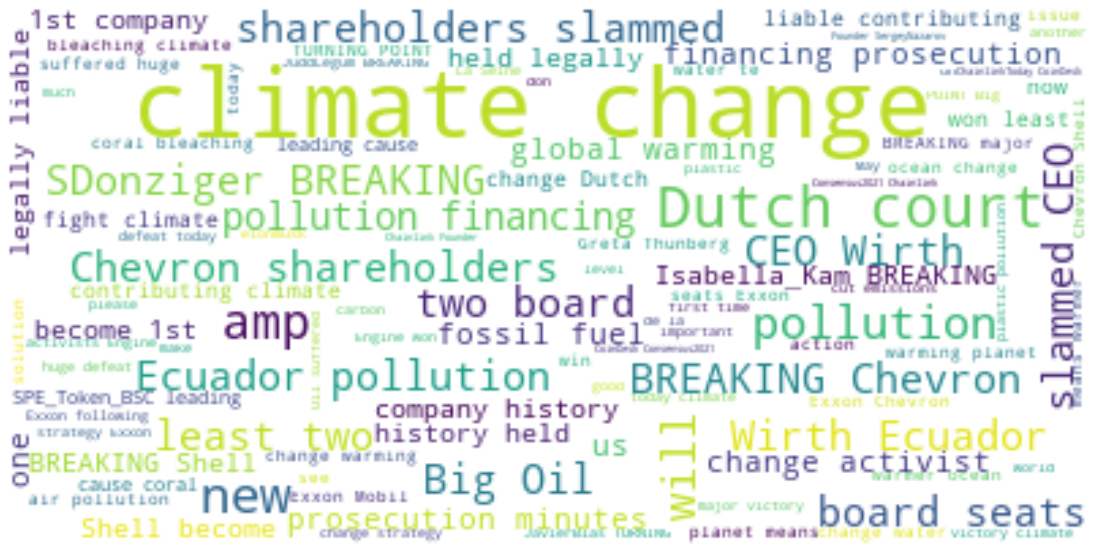

In [473]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["RT", "https", "CO"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
#Accessing my Greta Thunberg account information
user = api.get_user(screen_name = 'GretaThunberg')
print(user)

User(_api=<tweepy.api.API object at 0x7fb766431490>, _json={'id': 1006419421244678144, 'id_str': '1006419421244678144', 'name': 'Greta Thunberg', 'screen_name': 'GretaThunberg', 'location': 'Sverige', 'profile_location': None, 'description': 'Climate- and environmental activist with Asperger’s  Born at 375 ppm', 'url': 'https://t.co/iiIXB0q4u6', 'entities': {'url': {'urls': [{'url': 'https://t.co/iiIXB0q4u6', 'expanded_url': 'http://ClimateEmergencyEU.org', 'display_url': 'ClimateEmergencyEU.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 4997404, 'friends_count': 2530, 'listed_count': 10573, 'created_at': 'Tue Jun 12 06:14:23 +0000 2018', 'favourites_count': 18345, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 9696, 'lang': None, 'status': {'created_at': 'Wed May 26 14:53:52 +0000 2021', 'id': 1397566660458991625, 'id_str': '1397566660458991625', 'text': 'So to summarize, very insuffic